# MINST Kaggle Competition with Tensorflow

Import relevant libaries

In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

## Load Image Data

In [77]:
df = pd.read_csv('data/train.csv', sep=',', header=0)

In [78]:
# read labels
Y = df[['label']].as_matrix()

# read image data
pixels = [col for col in df.columns if not col == 'label']
X = df[pixels].as_matrix()

print("X shape", X.shape)
print("Y shape", Y.shape)

X shape (42000, 784)
Y shape (42000, 1)


First 10 labels:

   [1 0 1 4 0 0 7 3 5 3]

First 10 images:


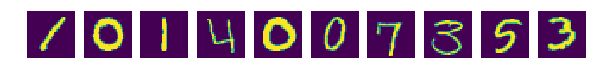

In [79]:
N = 10
print("First %s labels:\n" % (N))
print("   %s\n" % Y[:N].flatten())
print("First %s images:" % N)
fig = plt.figure(1, figsize=(10,10))
for i in range(N):
    img = X[i].reshape(28,28)
    fig.add_subplot(1, N, i+1)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
plt.show()

## Create Neural Network Classifier (LeNet)

![](https://www.pyimagesearch.com/wp-content/uploads/2016/06/lenet_architecture-768x226.png)

Split data into X_train/Y_train and X_test/Y_test groupings

In [80]:
np.random.seed(42)
r = np.random.rand(X.shape[0])
X_train = X[r<0.95]
X_test = X[r>=0.95]
Y_train = Y[r<0.95]
Y_test = Y[r>=0.95]
assert X_train.shape[0] == Y_train.shape[0]
assert X_test.shape[0] == Y_test.shape[0]
                                       
# create labels
Y_train_lbl = np_utils.to_categorical(Y_train, 10)
Y_test_lbl = np_utils.to_categorical(Y_test, 10)

print(Y_train[:3])
print(Y_train_lbl[:3])
X_train.shape, 2
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

[[1]
 [1]
 [4]]
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


Building the model

In [81]:
model = Sequential()

# conv1 -> pool1
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# conv2 -> poll2
model.add(Conv2D(50, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# fully connected layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(10))

ValueError: Negative dimension size caused by subtracting 2 from 1 for 'max_pooling2d_19/MaxPool' (op: 'MaxPool') with input shapes: [?,1,28,20].

In [ ]:
# use stochastic gradient descent with learning rate 0.01
opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.fit(x=X_train, y=Y_train_lbl, batch_size=128, epochs=20, verbose=1)